<a href="https://colab.research.google.com/github/vanyagoncharov/CourseMLResourse/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


# from sklearn.datasets import make_classification
from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from mlxtend.plotting import plot_decision_regions  # требуется установка mlxtend

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

In [ ]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:.5f}'.format
pd.options.mode.use_inf_as_na = True



%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Загрузка датасетов

In [ ]:
# рак груди
# from sklearn import datasets
# data = datasets.load_breast_cancer()
# X = pd.DataFrame(data["data"],
# columns=data["feature_names"])
# y = data["target"]

In [ ]:
# титаник
# import seaborn as sns
# df = sns.load_dataset('titanic')
# X = df.drop(columns='survived')
# y = df["survived"]

In [ ]:
# # Чтобы считывание данных с каггла заработало, нужно устновить kaggle
# !pip install kaggle -q



После необходимо скачать `kaggle.json` со своего профиля `kaggle`,
 для этого необходимо зайти в `setting`, далее найти раздел `API` и нажать на кнопку `create new token`

kaggle.json положить на гугл диск в root/.kaggle/kaggle.json
 и тогда скачивание датасетов заработает

 Минус такого подхода:
 у меня в каждой новой сессии приходится по-новой kaggle.json сохранять

 Альтернативный подход: скачать данные с kaggle заранее - положить архив или csv файл на гугл диск и считывать данные с гугл диска

In [ ]:
# https://www.kaggle.com/competitions/playground-series-s3e12/data?s
# elect=train.csv

!kaggle competitions download -c playground-series-s3e12

zip_ref = zipfile.ZipFile('playground-series-s3e12.zip', 'r')
zip_ref.extractall()
zip_ref.close()
df = pd.read_csv('train.csv')
X = df.drop(columns=['id', 'target'])
y = df['target']

playground-series-s3e12.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# https://www.kaggle.com/competitions/playground-series-s3e10/data?s
# elect=train.csv

# !kaggle competitions download -c playground-series-s3e10
# # разархивируем
# print('а теперь будем разархивировать')
# zip_ref = zipfile.ZipFile('playground-series-s3e10.zip', 'r')
# zip_ref.extractall()
# zip_ref.close()
# # считаем данные
# df = pd.read_csv('train.csv')
# X = df.drop(columns=['id', 'Class'])
# y = df['Class']


In [ ]:
# загрузим датасет с ирисами
# data = datasets.load_breast_cancer()
# X = pd.DataFrame(data["data"], columns=data["feature_names"])
# y = data["target"]

#EDA

In [ ]:
# Размер датасета
print(f"В датасете: {X.shape[0]} строк")

# Information about columns and data types
print(f"\n В датасете {X.shape[1]} столбцов, из них :")
print(X.dtypes.value_counts())

В датасете: 414 строк

 В датасете 6 столбцов, из них :
float64    4
int64      2
dtype: int64


In [ ]:
X.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
dtype: object

In [ ]:
print("\n Статистика по столбцам:")
X.describe().T


 Статистика по столбцам:


,count,mean,std,min,25%,50%,75%,max
gravity,414.00000,1.01789,0.00667,1.00500,1.01200,1.01800,1.02200,1.04000
ph,414.00000,5.95546,0.64226,4.76000,5.53000,5.74000,6.28000,7.94000
osmo,414.00000,651.54589,234.67657,187.00000,455.25000,679.50000,840.00000,1236.00000
cond,414.00000,21.43792,7.51475,5.10000,15.50000,22.20000,27.60000,38.00000
urea,414.00000,278.65700,136.44225,10.00000,170.00000,277.00000,385.00000,620.00000
calc,414.00000,4.11464,3.21764,0.17000,1.45000,3.13000,6.63000,14.34000


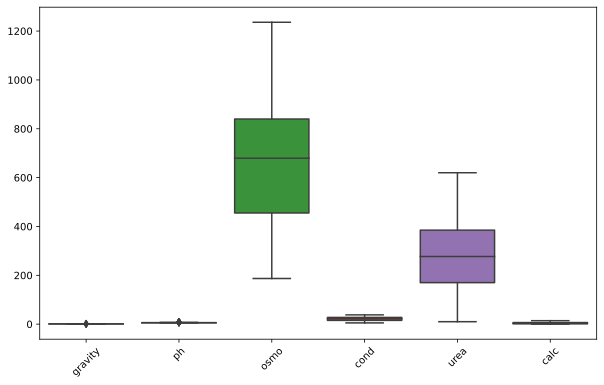

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

**Вывод :**
- Датасет по ирисам небольшой, содержит 150 строк и 4 столбца
- Пропусков нет
- Выбросов нет

In [ ]:
# распределение целевой
print("\nTarget Class Distribution:")
pd.Series(y).value_counts()



Target Class Distribution:


0    230
1    184
Name: target, dtype: int64

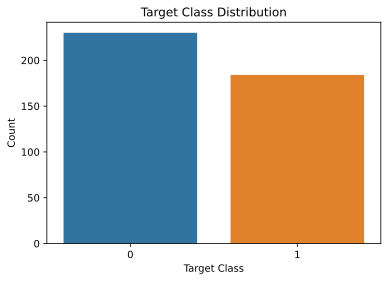

In [ ]:
# Bar plot for target class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=pd.Series(y))
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.title('Target Class Distribution')
plt.show()

**Вывод:**

Целевая переменная распроделена равномерно , каждый класс равновероятен

In [ ]:
# Проанализируем взаимосвязи между переменными
# sns.pairplot(X)
# plt.show()

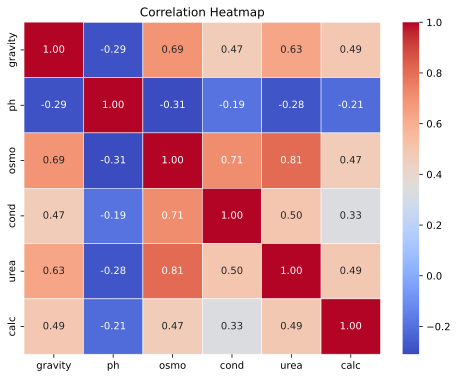

In [ ]:
# Построим матрицу корреляций
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
X.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')

**Вывод**
В данных наблюдается высокая прямая корреляция между следующими признаками:


1.   sepal length (cm) и petal width (cm)
2.   petal length (cm) и petal width (cm)
3.   petal length (cm) и sepal length (cm)



**Цель данного ноутбука** сравнить методы классификации SVM, logistic regression и knn classification

По этой причине перейдём к задаче бинарной классификации: будем предсказывать принадлежность цветка к виду versicolor против принадлежности ко всем прочим видам.

Для этого перекодируйте зависимую переменную так, чтобы цветки вида versicolor имели метку 1, а прочих видов – метку -1.

In [ ]:
# Перекодировка
y_bin = y
#  (data["target"] == 1).astype(int)

Из всех признаковы выберем только 2 признака, чтобы можно было наглядно продемонстрировать работу алгоритмов (отрисовать зоны принятия решения в двумерной плоскости)

- Будем работать с двумя признаками: sepal length (cm) и sepal width (cm). Отделим их в отдельный датафрейм.


- Далее Разделим выборку на обучающую и тестовую, долю тестовой выборки выберем  равной 0.4.


- Также отмасштабируем выборки при помощи StandardScaler, то есть приведем наши данные к к данным со средним = 0 и среднеквадратическим отклонением = 1



In [ ]:
X

,gravity,ph,osmo,cond,urea,calc
0,1.01300,6.19000,443,14.80000,124,1.45000
1,1.02500,5.40000,703,23.60000,394,4.18000
2,1.00900,6.13000,371,24.50000,159,9.04000
3,1.02100,4.91000,442,20.80000,398,6.63000
4,1.02100,5.53000,874,17.80000,385,2.21000
...,...,...,...,...,...,...
409,1.01100,5.21000,527,21.40000,75,1.53000
410,1.02400,5.53000,577,19.70000,224,0.77000
411,1.01800,6.28000,455,22.20000,270,7.68000
412,1.00800,7.12000,325,12.60000,75,1.03000


In [ ]:
np.random.seed(123)

# X = X[["sepal length (cm)", "sepal width (cm)"]]

X_train, X_test, y_train, y_test = train_test_split(X, y_bin, train_size=0.6, stratify=y_bin)

# Отмасштабируйте признаки
ss = StandardScaler() # (x-m)/sigma

X_train = ss.fit_transform(X_train)

X_test = ss.transform(X_test)


In [ ]:
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train);

In [ ]:
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test);

In [ ]:
# Функция для построения графиков решающих областей
def plot_decision_boundary(model, X, y):
    # Параметры для графика
    h = .02  # Шаг сетки
    cmap = plt.cm.RdYlBu
    markers = 's^o'  # Маркеры для классов

    # Обучение модели
    model.fit(X, y)

    # Размеры графика
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Предсказание значений на сетке
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Построение контуров
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap)

    # Разметка классов
    for i, c in zip(range(2), markers):
        plt.scatter(X[y == i][:, 0], X[y == i][:, 1], marker=c, label=f"Class {i}")

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Regions ({type(model).__name__})')
    plt.legend()
    plt.show()


In [ ]:
# Функция для расчета метрик и построения кривой ROC
def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на обучающей и тестовой выборке
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Расчет метрик precision и recall
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)

    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f"Test Precision: {test_precision:.2f}")
    print(f"Test Recall: {test_recall:.2f}")

    metrics =  {'params': ['Training_Precision', 'Test_Precision','Training_Recall', 'Test_Recall'],
                'values': [train_precision, test_precision, train_recall, test_recall]}

    # Расчет ROC-AUC на тестовой выборке
    try:
      pred_test = model.predict_proba(X_test)
      pred_train = model.predict_proba(X_train)
      roc_auc_test = roc_auc_score(y_test, pred_test[:, 1])
      roc_auc_train = roc_auc_score(y_train, pred_train[:, 1])
      print(f"ROC-AUC_test = : {roc_auc_test:.2f} и ROC-AUC_train = : {roc_auc_train:.2f}")

      # Построение кривой ROC
      fpr_test, tpr_test, _ = roc_curve(y_test, pred_test[:, 1])
      fpr_train, tpr_train, _ = roc_curve(y_train, pred_train[:, 1])
      plt.figure()
      plt.plot(fpr_test, tpr_test, color='blue', lw=2, label = 'ROC Curve test')
      plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label = 'ROC Curve test')
      plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.legend()
      plt.title(f'ROC Curve ({type(model).__name__})')
      plt.show()
    except Exception as e:
      print(e)
    return metrics




# Models

In [ ]:
# Построение модели k-Nearest Neighbors (kNN)
knn_model = KNeighborsClassifier()

In [ ]:
# Задаем сетку параметров для значения "n_neighbors", которое мы хотим исследовать
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 14]}  # Пример значений, можно изменить диапазон по необходимости

# Создаем объект GridSearchCV с моделью KNN и сеткой параметров
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='roc_auc')  # Параметр cv определяет количество фолдов в кросс-валидации

# Обучаем модель на данных с помощью кросс-валидации
grid_search.fit(X_train, y_train)

# Получаем лучшее найденное значение параметра "n_neighbors" в результате кросс-валидации
best_n_neighbors = grid_search.best_params_['n_neighbors']
print('best_n_neighbors =', best_n_neighbors)


best_n_neighbors = 11


In [ ]:
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)

In [ ]:
best_knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

Training Precision: 0.75
Training Recall: 0.68
Test Precision: 0.70
Test Recall: 0.59
ROC-AUC_test = : 0.79 и ROC-AUC_train = : 0.81


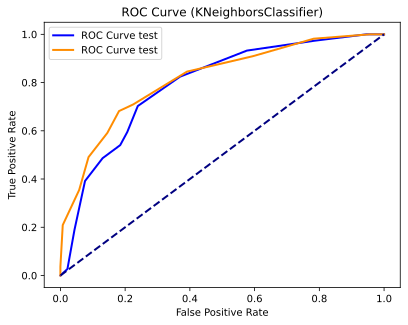

In [ ]:
metrics_knn = calculate_metrics_and_plot_roc(best_knn_model, X_train, y_train, X_test, y_test)

**Вывод**


k ближайщих соседей сильно переобучился, это видно и по графику ROC кривой, и по метрикам ROC-AUC, Precision, Recall

## поиск параметров

Поиск параметров моделей возможен либо через GridSearchCV, либо RandomizedSearchCV, Optuna и так далее

в ноутбуке рассматривается только 2 метода : GridSearchCV и RandomizedSearchCV

Когда нужно, чтобы поиск отработал быстрее, рекомендуется использовать RandomizedSearchCV

In [ ]:
%%time
# Определяем сетку параметров для C, которые мы хотим проверить
param_grid = {'C': [0.01, 0.1, 1, 10, 20, 30, 50, 100],
              'penalty': ['l2','l1',],
              # 'solver': ['liblinear','saga']
              }

# Создаем модель логистической регрессии
logreg_model = LogisticRegression(solver='saga', max_iter = 100000)

# Создаем объект GridSearchCV с моделью логистической регрессии и сеткой параметров
grid_search = GridSearchCV(logreg_model,
                           param_grid,
                           cv=5,
                           scoring='roc_auc')  # cv указывает количество блоков для кросс-валидации

# Обучаем модель на данных с использованием кросс-валидации
grid_search.fit(X_train, y_train)

# Получаем лучшее значение параметра C, найденное в процессе кросс-валидации
# best_params = grid_search.best_params_[param_grid]
print('Лучшее значение параметра:', grid_search.best_params_)


Лучшее значение параметра: {'C': 0.1, 'penalty': 'l1'}
CPU times: user 551 ms, sys: 0 ns, total: 551 ms
Wall time: 601 ms


In [ ]:
%%time
# Определяем сетку параметров для C, которые мы хотим проверить
param_grid = {'C': [0.01, 0.1, 1, 10, 20, 30, 50, 100],
              'penalty': ['l2', 'l1'],
              # 'solver': ['liblinear', 'saga']
              }

# Создаем модель логистической регрессии
logreg_model = LogisticRegression(solver='saga', max_iter=100000)

# Создаем объект RandomizedSearchCV с моделью логистической регрессии и сеткой параметров
random_search = RandomizedSearchCV(logreg_model,
                                   param_distributions=param_grid,
                                   n_iter=10,
                                   cv=5, scoring='roc_auc')

# Обучаем модель на данных с использованием кросс-валидации
random_search.fit(X_train, y_train)

# Получаем лучшее значение параметров, найденных в процессе кросс-валидации
print('Лучшие значения параметров:', random_search.best_params_)


Лучшие значения параметров: {'penalty': 'l1', 'C': 0.1}
CPU times: user 206 ms, sys: 212 µs, total: 206 ms
Wall time: 209 ms


In [ ]:

# Построение модели логистической регрессии
logreg_model = LogisticRegression(solver='saga',  max_iter=1000, **grid_search.best_params_)
# plot_decision_boundary(logreg_model, X_train, y_train)

In [ ]:
logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
logreg_model.coef_

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.95271041]])

Training Precision: 0.79
Training Recall: 0.52
Test Precision: 0.80
Test Recall: 0.54
ROC-AUC_test = : 0.79 и ROC-AUC_train = : 0.79


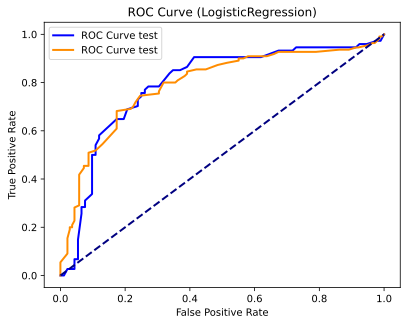

In [ ]:
metrics_logreg  = calculate_metrics_and_plot_roc(logreg_model, X_train, y_train, X_test, y_test)

**Вывод**

Логистическая регрессия переобучена, заметим, что  меньше, чем KNN.


In [ ]:
from sklearn.svm import SVC
# Определяем сетку параметров для C, которые мы хотим проверить
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              }

# Создаем модель логистической регрессии
svm_model = SVC(kernel='linear', C=0.0)

# Создаем объект GridSearchCV с моделью логистической регрессии и сеткой параметров
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv указывает количество блоков для кросс-валидации

# Обучаем модель на данных с использованием кросс-валидации
grid_search.fit(X_train, y_train)

# Получаем лучшее значение параметра C, найденное в процессе кросс-валидации
# best_params = grid_search.best_params_[param_grid]
print('Лучшее значение параметра:', grid_search.best_params_)


# Создаем модель логистической регрессии с лучшим значением C
best_svm_model = SVC(kernel='linear', **grid_search.best_params_)

Лучшее значение параметра: {'C': 1}


In [ ]:
# plot_decision_boundary(best_svm_model, X_train, y_train)

In [ ]:
metrics_svm_linear  = calculate_metrics_and_plot_roc(best_svm_model, X_train, y_train, X_test, y_test)

Training Precision: 0.79
Training Recall: 0.55
Test Precision: 0.80
Test Recall: 0.59
predict_proba is not available when  probability=False


**Вывод**

По метрикам качества Precision и Recall видно, что переобучение уменьшилось, SVM линейный пока выигрывает

Может мы еще сможем улучшить модель? Например, добавим нелинейности в SVM

In [ ]:
from sklearn.svm import SVC
# Определяем сетку параметров для C, которые мы хотим проверить
param_grid = {'C': [0.01, 0.1, 1],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid',]
              }

# Создаем модель логистической регрессии
svm_model = SVC(kernel='linear')

# Создаем объект GridSearchCV с моделью логистической регрессии и сеткой параметров
grid_search = GridSearchCV(svm_model, param_grid, cv=5)  # cv указывает количество блоков для кросс-валидации

# Обучаем модель на данных с использованием кросс-валидации
grid_search.fit(X_train, y_train)

# Получаем лучшее значение параметра C, найденное в процессе кросс-валидации
# best_params = grid_search.best_params_[param_grid]
print('Лучшее значение параметра:', grid_search.best_params_)


# Создаем модель логистической регрессии с лучшим значением C
best_svm_model = SVC(**grid_search.best_params_)

Лучшее значение параметра: {'C': 1, 'kernel': 'rbf'}


In [ ]:
metrics_svm_not_linear  = calculate_metrics_and_plot_roc(best_svm_model, X_train, y_train, X_test, y_test)

Training Precision: 0.80
Training Recall: 0.70
Test Precision: 0.76
Test Recall: 0.61
predict_proba is not available when  probability=False


**Вывод**

Нет, добавление нелинейности в SVM не помогло, наоброт только все испортило.




**Соберем все результаты в одну таблицу, чтобы было проще сравнивать алгоритмы**

In [ ]:
metrics_svm_not_linear['metrics'] = ['metrics_svm_not_linear' for i in range(4)]

metrics_svm_linear['metrics'] = ['metrics_svm_linear' for i in range(4)]

# metrics_poly_logreg['metrics'] = ['metrics_poly_logreg' for i in range(4)]

metrics_logreg['metrics'] = ['metrics_logreg' for i in range(4)]
metrics_knn['metrics'] = ['metrics_knn' for i in range(4)]

In [ ]:
df_stat = pd.concat([pd.DataFrame(metrics_svm_not_linear),
                    pd.DataFrame(metrics_svm_linear),
                    # pd.DataFrame(metrics_poly_logreg),
                    pd.DataFrame(metrics_logreg),
                    pd.DataFrame(metrics_knn)])

In [ ]:
df_stat = df_stat.pivot_table(columns = 'params',
                            index='metrics',
                            values='values').reset_index()[['metrics','Test_Precision',	'Training_Precision',
                                                            'Test_Recall',	'Training_Recall']]
df_stat['dif_Precision'] = round((df_stat['Test_Precision'] - df_stat['Training_Precision'])/df_stat['Training_Precision'],2)

df_stat['dif_Recall'] = round((df_stat['Test_Recall'] - df_stat['Training_Recall'])/df_stat['Training_Recall'],2)
df_stat

params,metrics,Test_Precision,Training_Precision,Test_Recall,Training_Recall,dif_Precision,dif_Recall
0,metrics_knn,0.69841,0.75000,0.59459,0.68182,-0.07000,-0.13000
1,metrics_logreg,0.80000,0.79167,0.54054,0.51818,0.01000,0.04000
2,metrics_svm_linear,0.80000,0.78947,0.59459,0.54545,0.01000,0.09000
3,metrics_svm_not_linear,0.76271,0.80208,0.60811,0.70000,-0.05000,-0.13000


In [ ]:
df_stat['abs_dif_precision'] = abs(df_stat['dif_Precision'])

In [ ]:
df_stat.sort_values('abs_dif_precision', ascending=True)

params,metrics,Test_Precision,Training_Precision,Test_Recall,Training_Recall,dif_Precision,dif_Recall,abs_dif_precision
1,metrics_logreg,0.80000,0.79167,0.54054,0.51818,0.01000,0.04000,0.01000
2,metrics_svm_linear,0.80000,0.78947,0.59459,0.54545,0.01000,0.09000,0.01000
3,metrics_svm_not_linear,0.76271,0.80208,0.60811,0.70000,-0.05000,-0.13000,0.05000
0,metrics_knn,0.69841,0.75000,0.59459,0.68182,-0.07000,-0.13000,0.07000



Получается, что наиболее точным и непереобученным алгоритмом оказался SVM линейный, по параметрам dif_Precision и dif_Recall видно, что разница между параметрами на трейне и тесте наименьшая по сравнению со всемит остальными алгоритмами